#  Testing Swap Test with partial overlap
This notebook will test our swap test implementation that computes the overlap Tr$({\rho^{A}}^2)$, where now $\rho^{A}$ is a reduced density matrix of some density matrix $\rho$.

In [1]:
from sys import path
path.insert(0, '..')

from swap import *
from utilities import *
import numpy as np
import matplotlib.pyplot as plt

Let

$$
|\psi> = \frac{1}{2}\left( \sqrt{1+r}\left(|00>+ |01>\right)+\sqrt{1-r}\left(|10> - |11>\right)\right)
$$
where $0\leq r \leq 1$. Then the reduced density matrix for the first qubit is
$$\rho^{A} = \frac{I + r\sigma_{z}}{2}$$
To perform the overlap via the swap test, we'll first have to construct the quantum circuits representing these wavefunctions:

In [2]:
r = .5
psi = psi2_qc(r)        #quantum circuit
psi_c = psi2_classical(r) #classical representation

The circuit for $|\psi>$ is drawn below:

In [3]:
psi.draw()

┌───────────┐   
q_0: ┤ RY(2pi/3) ├─■─
     └───┬───┬───┘ │ 
q_1: ────┤ H ├─────■─
         └───┘

Now, let's look at the swap test quantum circuit with this wavefuntion:

In [7]:
#constructing the swap circuit
qc_swap = swap_test_QC(psi, psi, [0])
qc_swap.draw()

┌───┐          ┌───┐┌─┐
  a_0: ────┤ H ├────────■─┤ H ├┤M├
       ┌───┴───┴───┐    │ └───┘└╥┘
psi_0: ┤ RY(2pi/3) ├─■──X───────╫─
       └───┬───┬───┘ │  │       ║ 
psi_1: ────┤ H ├─────■──┼───────╫─
       ┌───┴───┴───┐    │       ║ 
phi_0: ┤ RY(2pi/3) ├─■──X───────╫─
       └───┬───┬───┘ │          ║ 
phi_1: ────┤ H ├─────■──────────╫─
           └───┘                ║ 
  m_0: ═════════════════════════╩═

Now we run the simulation and obtain the overlap. Then we compare to the exact results:

In [8]:
overlap_qc = swap_overlap(psi, psi, idx_list=[0], shots=100000)
overlap_cl = classical_partial_overlap(psi_c, psi_c)

In [9]:
print("swap test overlap: {}".format(overlap_qc))
print("    exact overlap: {}".format(overlap_cl))
print("            error: {}".format(np.abs(overlap_qc-overlap_cl)))

swap test overlap: 0.62298
    exact overlap: 0.6249999999999999
            error: 0.0020199999999999108


Now let's look at how these overlaps compare as we tune $r$

In [10]:
N = 100
r_list = np.linspace(0, 1, N)
o_qc_list = np.zeros(N)
o_cl_list = np.zeros(N)
error_list = np.zeros(N)

for i, r in enumerate(r_list):
    psi = psi2_qc(r)
    psi_c = psi2_classical(r)
    o_qc_list[i] = swap_overlap(psi, psi, idx_list=[0], shots=100000)
    o_cl_list[i] = classical_partial_overlap(psi_c, psi_c)
    error_list[i] = np.abs(o_qc_list[i] - o_cl_list[i])   

<IPython.core.display.Javascript object>


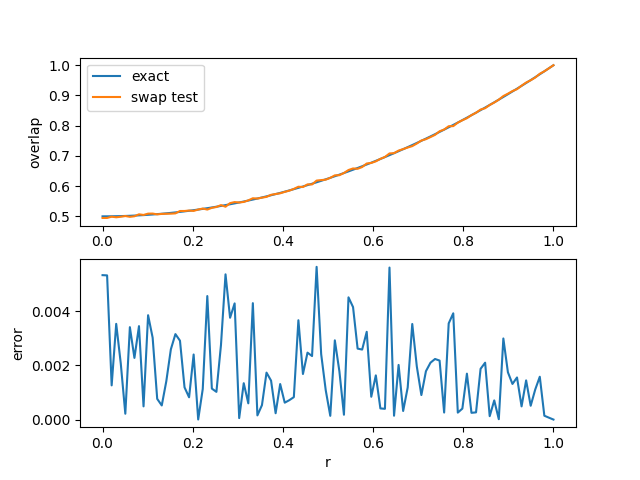

In [11]:
%matplotlib notebook

plt.subplot(211)
plt.plot(r_list, o_cl_list, label="exact")
plt.plot(r_list, o_qc_list, label="swap test")
plt.legend(loc='best')
plt.ylabel("overlap")
plt.subplot(212)
plt.plot(r_list, error_list)
plt.xlabel("r")
plt.ylabel("error")
plt.show()